In [150]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, e, exp
from decimal import Decimal

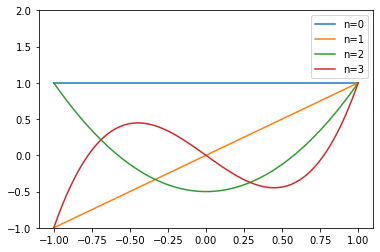

In [156]:
# legendre
def P(n, x):
    if n == 0:
        return np.full(len(x), 1)
    elif n == 1:
        return x
    else:
        return (((2 * n) - 1) * x * P(n - 1, x) - (n - 1) * P(n - 2, x)) / n


x = np.linspace(-1, 1, 100)
lim = (0, 4)
splits = False
for n in range(*lim):
    plt.ylim(-1, 2)
    y = P(n, x)
    plt.plot(x, y, label=f"n={n}")
    plt.legend()
    if splits:
        plt.show()
if not splits:
    plt.ylim(-1, 2)
    plt.show()

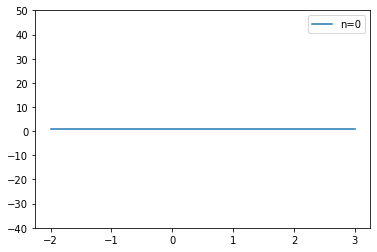

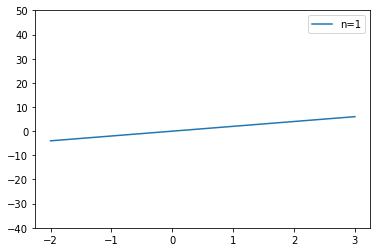

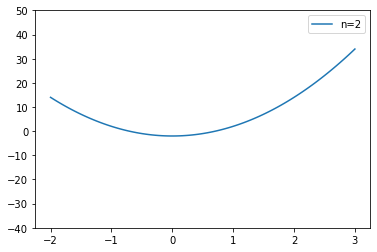

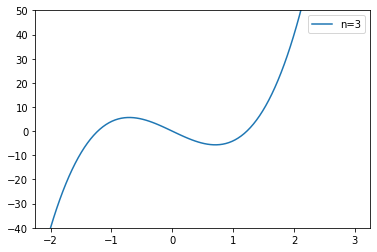

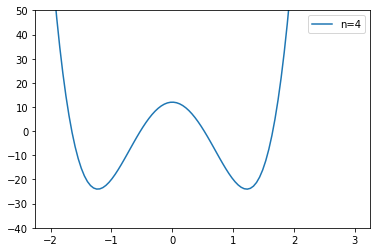

In [157]:
# hermit
def H(n, x):
    if n == 0:
        return np.full(len(x), 1)
    elif n == 1:
        return 2 * x
    else:
        return 2 * x * H(n - 1, x) - 2 * (n - 1) * H(n - 2, x)


x = np.linspace(-2, 3, 100)
lim = (0, 5)
splits = True
for n in range(*lim):
    plt.ylim(-40, 50)
    y = H(n, x)
    plt.plot(x, y, label=f"n={n}")
    plt.legend()
    if splits:
        plt.show()
if not splits:
    plt.ylim(-40, 50)
    plt.show()


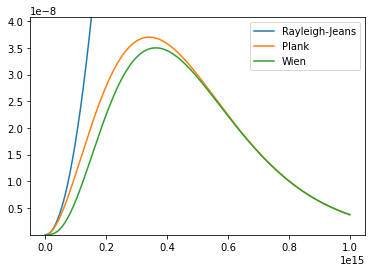

In [160]:
# 輻射強度, 以頻率為基本
c = 299792458
k = 1.38064852e-23
h = 6.626069934e-34


def RJ(v, T=5800):
    return 2 * v ** 2 * k * T / c ** 2


def Plank(v, T=5800):
    i = 2 * h * v ** 3 / c ** 2 / (np.exp(h * v / (k * T)) - 1)
    return i


def Wien(v, T=5800):
    return 2 * h * v ** 3 / c ** 2 * np.exp(-h * v / (k * T))


x = np.linspace(1e10, 1e15, 1000)  # Hz
pl = Plank(x, 5800)
rj = RJ(x, 5800)
wi = Wien(x, 5800)
plt.ylim(np.min(pl), np.max(pl) * 1.1)
plt.plot(x, rj, label="Rayleigh-Jeans")
plt.plot(x, pl, label="Plank")
plt.plot(x, wi, label="Wien")
plt.legend()
plt.show()

C:\Users\Tom\AppData\Local\Temp\ipykernel_13344\1501232514.py:12: RuntimeWarning: overflow encountered in exp
  return 2 * h * c**2 / l**5 / (np.exp(h * c / (l * k * T)) - 1)


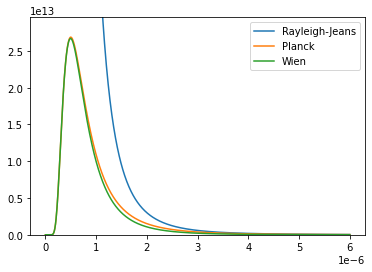

In [167]:
# 輻射強度, 以波長為基本
c = 299792458
k = 1.38064852e-23
h = 6.626069934e-34


def RJ(l, T=5800):
    return 2 * c * k * T / l ** 4


def Planck(l, T=5800):
    return 2 * h * c**2 / l**5 / (np.exp(h * c / (l * k * T)) - 1)


def Wien(l, T=5800):
    return 2 * h * c ** 2 / l ** 5 * np.exp(-h * c / (l * k * T))


x = np.linspace(1e-10, 6e-6, 1000)  # Hz
pl = Planck(x, 5800)
rj = RJ(x, 5800)
wi = Wien(x, 5800)
plt.ylim(np.min(pl), np.max(pl) * 1.1)
plt.plot(x, rj, label="Rayleigh-Jeans")
plt.plot(x, pl, label="Planck")
plt.plot(x, wi, label="Wien")
plt.legend()
plt.show()